# Logistic Regression using Scipy minimizations tools
Our dataset is comprised of exam1Score, exam2Score, admitted (0 or 1). We are trying determine the probability of a student to be admitted based on their exam scores.

In [1]:
import numpy as np
from pathlib import Path
from LogisticRegression import cost_function, gradient

## Data extraction and visualization

In [2]:
#Reading data from the file
data_folder = Path(r'C:\Users\anast\PycharmProjects\ML\machine-learning-ex2\ex2')
file = data_folder / 'ex2data1.txt'
dataset = np.loadtxt(file, delimiter = ',')

In [3]:
dataset.shape

(100, 3)

In [4]:
dataset[5,2]

0.0

In [5]:
positives = dataset[dataset[:, 2] == 1.0,:]
negatives = dataset[dataset[:, 2] == 0.0, :]

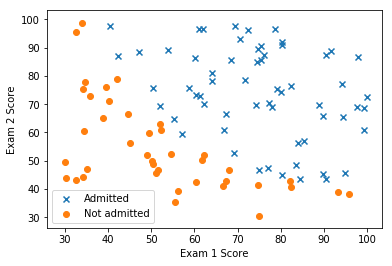

In [6]:
#Let's plot the positives against the negatives
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(positives[:, 0], positives[:, 1], marker = 'x', label = 'Admitted')
plt.scatter(negatives[:, 0], negatives[:, 1], marker = 'o', label = 'Not admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()

In [7]:
#Now that we have a nice graph, let's proceed with the implementation

## Preparing the feature matrix

As always, we extract the feature matrix and double check our methods are working properly

In [8]:
#Let's get the matrice for the implementation
X = dataset[:,0:2]
y = dataset[:,2]
m = len(y)
X = np.concatenate((np.ones((m, 1)), X), axis = 1)
_, n_total = X.shape
initial_theta = np.zeros((n_total))

In [9]:
#Please comment this function call if wanted. They are only for checking purposes.
jval = cost_function(initial_theta, X, y)
derivatives = gradient(initial_theta, X, y)

In [10]:
jval

0.6931471805599453

In [11]:
derivatives

array([ -0.1       , -12.00921659, -11.26284221])

## Finding values of $\theta$ that minimize $J_{\theta}$ using Scipy optimization 'TNC' that simulate ***fminunc*** in MATLAB/OCTAVE

In [12]:
#Using optimization tools from the Scipy package to simulat fminunc in Octave

#IMPORTANT: Scipy minimization tools require that user defined functions take parameters (xo, args = ())
#If parameters are not in this order, the method will FAIL to find a solution.
import scipy.optimize as op
R = op.minimize(cost_function, initial_theta, args = (X,y), jac = gradient, method='TNC')

In [13]:
theta_optimal_advanced = R.x

In [14]:
R.message #Just to check algorithm exited correctly

'Local minimum reached (|pg| ~= 0)'

In [15]:
th0, th1, th2 = theta_optimal_advanced

## Visualizing the data with Decision Boundary
We create some dummy data to help visualize the the decisio boundary

In [16]:
# Let's now visualize our result
# Building some dummy data. We want to express the line th0 + th1x1 + th2x2 = 0 as a function
# of x1
x_vals = np.linspace(min(X[:, 1]), max(X[:, 2]), 2)
optimal_function =  lambda x: -(th1*x)/th2 - th0/th2
y_vals = [optimal_function(i) for i in x_vals]

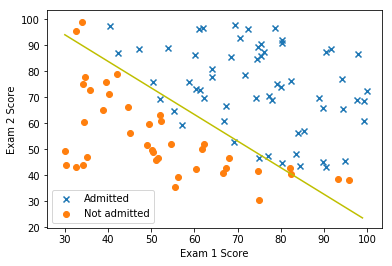

In [17]:
#Plotting the data
%matplotlib inline
plt.scatter(positives[:, 0], positives[:, 1], marker = 'x', label = 'Admitted')
plt.scatter(negatives[:, 0], negatives[:, 1], marker = 'o', label = 'Not admitted')
plt.plot(x_vals, y_vals, color = 'y')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()

ALternatively, we could use a plotDecisionBoundary function

In [18]:
from LogisticRegression import plotDecisionBoundary

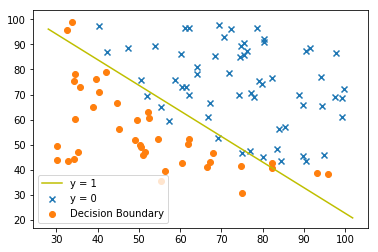

In [19]:
plotDecisionBoundary(theta_optimal_advanced, X,y)

## Getting accuracy of the model

In [20]:
from LogisticRegression import predict_single

In [21]:
predict_single(theta_optimal_advanced, X, y)

0.89